In [1]:
from pathlib import Path

from data_utils import load_params, load_results, get_sample_based_scores
from eval import calculate_cf_matrix, plot_cf_matrix, plot_ovr_frr_dr, get_y_true_and_y_pred_for_cf_matrix, get_y_true_roc_and_y_good_score_for_roc_curve
import yaml
import pandas as pd

# Load data

In [2]:
# import parameters
params_path = Path('./params_C51_W1.yml')
import_params = load_params(params_path, 'import_params')
export_params = load_params(params_path, 'export_params')

# import results.txt file and extract information from file names 
df_results_image_based = load_results(import_params.import_file_path, import_params)
df_results_image_based

image_name       category  \
0     /data/test/good/friction_cake_good_Image_Sidew...  friction_cake   
1     /data/test/good/friction_cake_good_Image_Sidew...  friction_cake   
2     /data/test/good/friction_cake_good_Image_Sidew...  friction_cake   
3     /data/test/good/friction_cake_good_Image_Sidew...  friction_cake   
4     /data/test/bad/friction_cake_bad_Image_Sidewal...  friction_cake   
...                                                 ...            ...   
2250  /data/test/good/friction_cake_good_Image_Sidew...  friction_cake   
2251  /data/test/good/friction_cake_good_Image_Sidew...  friction_cake   
2252  /data/test/good/friction_cake_good_Image_Sidew...  friction_cake   
2253  /data/test/good/friction_cake_good_Image_Sidew...  friction_cake   
2254  /data/test/good/damage_cake_good_Image_Sidewal...    damage_cake   

      sample  revolution  trigger truth       bad      good  
0         50           9        9  good  0.001523  0.998477  
1         46           3        2  good  0.202282  0.797718  
2         58           7       10  good  0.006435  0.993565  
3         33           3        2  good  0.004466  0.995534  
4         20           3        9   bad  1.000000  0.000000  
...      ...         ...      ...   ...       ...       ...  
2250      50          10        3  good  0.005667  0.994333  
2251       5           6        7  good  0.024506  0.975494  
2252      37           5        6  good  0.010245  0.989755  
2253      51           3        8  good  0.014040  0.985960  
2254      15           5        2  good  0.117811  0.882189  

[2255 rows x 8 columns]

# Filter categories and save data frame

In [3]:
# # filter relevant categories
# include_categories = [
#     'Airline',
#     'Verformt',
#     'BeschStopfen_',
#     'MarkStopfen_',
#     'PartikelIglo_',
#     'FaserStopfen',
#     'LyoStopfen',
#     'Gut'
# ]
# df_results_image_based = df_results_image_based[df_results_image_based.category.isin(include_categories)]

# save new data frame to csv file
export_path = Path(export_params.export_path)
path_image_based_csv = export_path / 'image_based_scores.csv'
df_results_image_based.to_csv(path_image_based_csv)

# Image-based evaluation

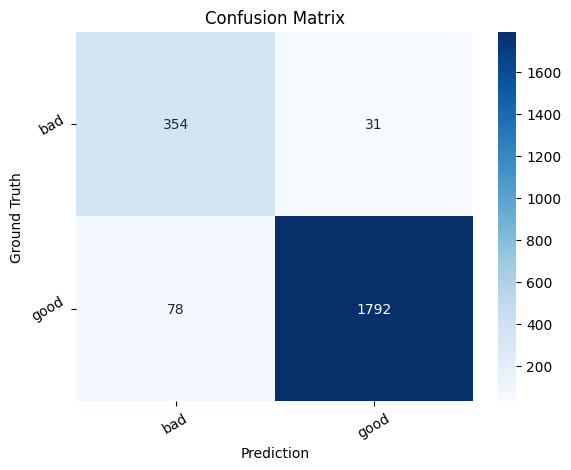

In [4]:
# Calculate prediction array (= y_pred). Prediction is the highest class score.
scores = df_results_image_based[import_params.model_classes]
truth = df_results_image_based.truth
y_true, y_pred = get_y_true_and_y_pred_for_cf_matrix(scores, truth, import_params)

# creating confusion matrix
cf_matrix = calculate_cf_matrix(y_true, y_pred, import_params)

# plotting and saving confusion matrix
save_path_cf_matrix = export_path / 'image_based_cf_matrix.png'
plot_cf_matrix(cf_matrix, save_path_cf_matrix, import_params.model_classes)

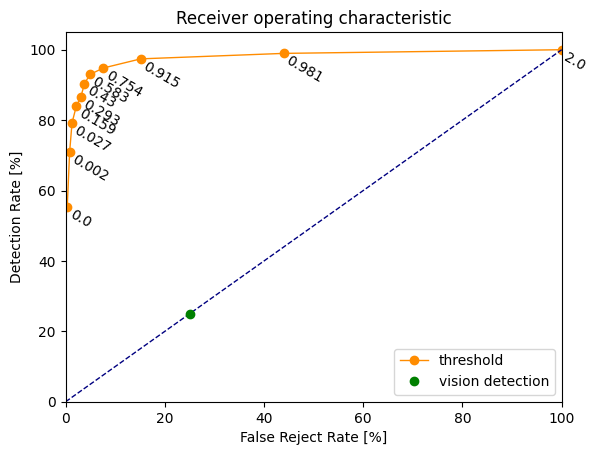

In [5]:
# converting truth to binary and calculate maximum negative score for ROC curve
y_true_roc, y_good_score = get_y_true_roc_and_y_good_score_for_roc_curve(df_results_image_based, import_params)

# plotting and saving ROC curve
save_path_ROC_curve = export_path / 'image_based_ROC_curve.png'
benchmark = [25,25]
plot_ovr_frr_dr(y_true_roc, y_good_score, save_path_ROC_curve, n = 15, pos_label=import_params.pos_label, benchmark=benchmark)


# Sample-based evaluation

In [6]:
df_results_sample_based = get_sample_based_scores(df_results_image_based, import_params)
df_results_sample_based

category  sample  revolution  \
0      damage_cake       1           1   
1      damage_cake       1           2   
2      damage_cake       1           3   
3      damage_cake       1           4   
4      damage_cake       1           5   
..             ...     ...         ...   
385  friction_cake      70           6   
386  friction_cake      70           7   
387  friction_cake      70           8   
388  friction_cake      70           9   
389  friction_cake      70          10   

                                            image_name  trigger truth  \
0    /data/test/bad/damage_cake_bad_Image_Sidewall_...        3   bad   
1    /data/test/bad/damage_cake_bad_Image_Sidewall_...        6   bad   
2    /data/test/bad/damage_cake_bad_Image_Sidewall_...       10   bad   
3    /data/test/bad/damage_cake_bad_Image_Sidewall_...       10   bad   
4    /data/test/bad/damage_cake_bad_Image_Sidewall_...        7   bad   
..                                                 ...      ...   ...   
385  /data/test/good/friction_cake_good_Image_Sidew...       10  good   
386  /data/test/good/friction_cake_good_Image_Sidew...       10  good   
387  /data/test/good/friction_cake_good_Image_Sidew...       10  good   
388  /data/test/good/friction_cake_good_Image_Sidew...       10  good   
389  /data/test/good/friction_cake_good_Image_Sidew...       10  good   

          bad      good sample_truth  
0    1.000000  0.000080          bad  
1    1.000000  0.002080          bad  
2    1.000000  0.526511          bad  
3    1.000000  0.711895          bad  
4    1.000000  0.009941          bad  
..        ...       ...          ...  
385  0.337224  0.995816          bad  
386  0.092333  0.999070          bad  
387  0.269726  0.994961          bad  
388  0.322225  0.991869          bad  
389  0.222220  0.997521          bad  

[390 rows x 9 columns]

In [7]:
# save sample based data frame to csv file
save_path_sample_based_csv= export_path / 'sample_based_test_scores.csv'
df_results_sample_based.to_csv(save_path_sample_based_csv)

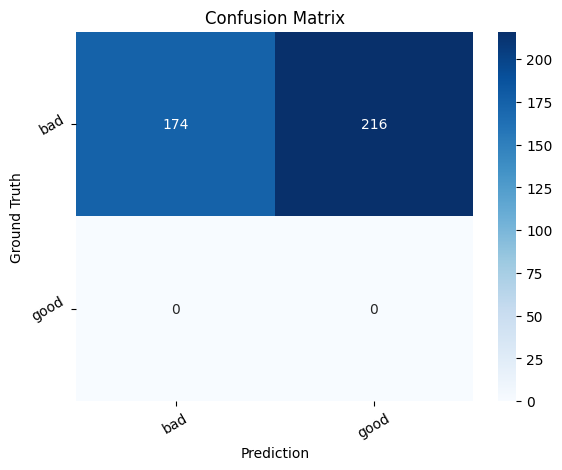

In [8]:
scores = df_results_sample_based[import_params.model_classes]
sample_truths = df_results_sample_based['sample_truth']
y_true, y_pred = get_y_true_and_y_pred_for_cf_matrix(scores, sample_truths, import_params)
cf_matrix = calculate_cf_matrix(y_true, y_pred, import_params)

# plotting and saving confusion matrix
save_path_cf_matrix = export_path / 'sample_based_cf_matrix.png'
plot_cf_matrix(cf_matrix, save_path_cf_matrix, import_params.model_classes)

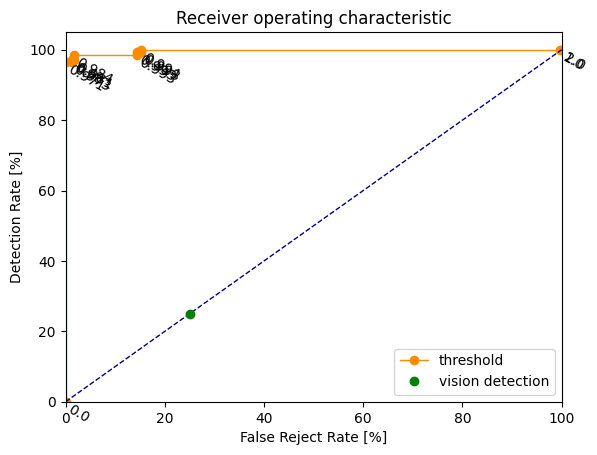

In [9]:
# converting truth to binary and calculate maximum negative score for ROC curve
y_true_roc, y_good_score = get_y_true_roc_and_y_good_score_for_roc_curve(df_results_sample_based, import_params)

# plotting and saving ROC curve
save_path_ROC_curve = export_path / 'sample_based_ROC_curve.png'
benchmark = import_params.benchmark
plot_ovr_frr_dr(y_true_roc, y_good_score, save_path_ROC_curve, n = 1, pos_label=import_params.pos_label, benchmark=benchmark)